In [1]:
import pandas as pd
from pathlib import Path
import numpy as np


In [2]:
graduation_data = Path("resources/graduation_data.csv")
state_data = Path("resources/state_data.csv")


In [5]:
graduation_data_df = pd.read_csv(graduation_data)
state_data_df = pd.read_csv(state_data)
graduation_data_df.head()


,State,2012-13
0,Alabama ..................,44233.0
1,Alaska ...................,7860.0
2,Arizona ..................,62208.0
3,Arkansas .................,28928.0
4,California ...............,422125.0


In [6]:
graduation_data_copy = graduation_data_df.copy()

In [7]:
graduation_data_copy["State"] = graduation_data_copy['State'].str.replace(r'\.+$', '', regex=True)
graduation_data_copy.head()


,State,2012-13
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [8]:
graduation_data_copy["State"]=graduation_data_copy["State"].apply(lambda x: x.strip())
graduation_data_copy.head()

,State,2012-13
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [9]:
graduation_data_copy = graduation_data_copy.rename(columns = {"State":"State", "2012-13":"Graduates"})
graduation_data_copy.head()

,State,Graduates
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [10]:
state_data_copy=state_data_df.copy()
state_data_copy=state_data_copy.rename(columns={"State Name [State] 2012-13":"State"})
state_data_copy.head()

,State Name,State,Instruction Expenditures (STE1) [State Finance] 2012-13,State Revenues (R3) per Pupil (MEMBR) [State Finance] 2012-13,Federal Revenues (STR4) per Pupil (MEMBR) [State Finance] 2012-13,Pupil/Teacher Ratio [State] 2012-13,Local Rev. - Property Tax (R1A) [State Finance] 2012-13,Grade 12 Students [Public School] 2012-13
0,CALIFORNIA,California,3.481554e+10,5696.00,1173.0,23.66,18324047150.00,494197.00
1,UTAH,Utah,2.494567e+09,4122.00,733.0,23.05,1466486401.00,40773.00
2,ARIZONA,Arizona,4.445724e+09,3640.00,1174.0,22.29,3013963966.00,81540.00
3,OREGON,Oregon,3.126634e+09,5177.00,970.0,22.25,2052018055.00,43637.00
4,NEVADA,Nevada,2.056074e+09,3135.00,902.0,21.54,1080252772.00,31939.00


In [11]:
merged=pd.merge(graduation_data_copy,state_data_copy,how="inner",on="State")
merged=merged.rename(columns={
    "State Revenues (R3) per Pupil (MEMBR) [State Finance] 2012-13":"State Revenue Per Pupil",
    "Federal Revenues (STR4) per Pupil (MEMBR) [State Finance] 2012-13":"Federal Revenue Per Pupil",
    "Pupil/Teacher Ratio [State] 2012-13":"Pupil to Teacher Ratio",
    "Grade 12 Students [Public School] 2012-13":"Grade 12 Students"
})
merged=merged.drop(["Instruction Expenditures (STE1) [State Finance] 2012-13","Local Rev. - Property Tax (R1A) [State Finance] 2012-13","State Name"],axis="columns")
merged

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students
0,Alabama,44233.0,5286.00,1142.0,14.35,‡
1,Alaska,7860.0,13918.00,2464.0,17.12,9681.00
2,Arizona,62208.0,3640.00,1174.0,22.29,81540.00
3,Arkansas,28928.0,5398.00,1259.0,14.24,30734.00
4,California,422125.0,5696.00,1173.0,23.66,494197.00
5,Colorado,50968.0,4360.00,814.0,17.65,62491.00
6,Connecticut,38722.0,7558.00,838.0,12.54,40743.00
7,Delaware,8070.0,8708.00,1491.0,13.94,8330.00
8,Florida,158029.0,3512.00,1147.0,15.25,183193.00
9,Georgia,92416.0,4474.00,1094.0,15.57,101078.00


In [12]:

merged["Grade 12 Students"]=merged["Grade 12 Students"].str.replace(r'[^0-9.]', '', regex=True).str.strip()
merged["Grade 12 Students"]=pd.to_numeric(merged["Grade 12 Students"],errors="coerce")

In [13]:
merged["State Revenue Per Pupil"]=pd.to_numeric(merged["State Revenue Per Pupil"],errors="coerce")

In [14]:
print(merged.dtypes)

merged.head()


State                         object
Graduates                    float64
State Revenue Per Pupil      float64
Federal Revenue Per Pupil    float64
Pupil to Teacher Ratio       float64
Grade 12 Students            float64
dtype: object


,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0
4,California,422125.0,5696.0,1173.0,23.66,494197.0


In [15]:
merged["Graduation Rates"]=merged["Graduates"]/merged["Grade 12 Students"]
merged["Combined Federal and State Revenue Per Pupil"]=merged["State Revenue Per Pupil"]+merged["Federal Revenue Per Pupil"]
merged

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN,NaN,6428.0
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0
5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0
6,Connecticut,38722.0,7558.0,838.0,12.54,40743.0,0.950396,8396.0
7,Delaware,8070.0,8708.0,1491.0,13.94,8330.0,0.968788,10199.0
8,Florida,158029.0,3512.0,1147.0,15.25,183193.0,0.862637,4659.0
9,Georgia,92416.0,4474.0,1094.0,15.57,101078.0,0.914304,5568.0


In [16]:
state_to_region = {
    "Hawaii":"West",
    "Washington":"West",
    "Oregon":"West",
    "California":"West",
    "Alaska":"West",
    "Nevada":"West",
    "Idaho":"West",
    "Montana":"West",
    "Wyoming":"West",
    "Colorado":"West",
    "Utah":"West",
    "New Mexico":"West",
    "Arizona":"West",
    "North Dakota":"Midwest",
    "South Dakota":"Midwest",
    "Nebraska":"Midwest",
    "Kansas":"Midwest",
    "Minnesota":"Midwest",
    "Iowa":"Midwest",
    "Missouri":"Midwest",
    "Wisconsin":"Midwest",
    "Illinois":"Midwest",
    "Michigan":"Midwest",
    "Indiana":"Midwest",
    "Ohio":"Midwest",
    "Texas":"South",
    "Oklahoma":"South",
    "Arkansas":"South",
    "Louisiana":"South",
    "Mississippi":"South",
    "Kentucky":"South",
    "Tennessee":"South",
    "Alabama":"South", 
    "Georgia":"South",
    "Florida":"South",
    "South Carolina":"South",
    "North Carolina":"South",
    "Virginia":"South",
    "West Virginia":"South",
    "Delaware":"South",
    "Maryland": 'South',
    "Pennsylvania": 'Northeast',
    "New York": 'Northeast',
    "New Jersey": 'Northeast',
    "Connecticut": 'Northeast',
    "Vermont": 'Northeast',
    "Rhode Island": 'Northeast',
    "Maine": 'Northeast',
    "Massachusetts": 'Northeast',
    "New Hampshire" : 'Northeast'
}
merged['Region'] = merged['State'].map(state_to_region)
merged

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN,NaN,6428.0,South
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0,West
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0,West
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0,South
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0,West
5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0,West
6,Connecticut,38722.0,7558.0,838.0,12.54,40743.0,0.950396,8396.0,Northeast
7,Delaware,8070.0,8708.0,1491.0,13.94,8330.0,0.968788,10199.0,South
8,Florida,158029.0,3512.0,1147.0,15.25,183193.0,0.862637,4659.0,South
9,Georgia,92416.0,4474.0,1094.0,15.57,101078.0,0.914304,5568.0,South


In [17]:
merged


,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN,NaN,6428.0,South
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0,West
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0,West
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0,South
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0,West
5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0,West
6,Connecticut,38722.0,7558.0,838.0,12.54,40743.0,0.950396,8396.0,Northeast
7,Delaware,8070.0,8708.0,1491.0,13.94,8330.0,0.968788,10199.0,South
8,Florida,158029.0,3512.0,1147.0,15.25,183193.0,0.862637,4659.0,South
9,Georgia,92416.0,4474.0,1094.0,15.57,101078.0,0.914304,5568.0,South


In [18]:
merged
copy_merged=merged.dropna()
copy_merged



,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0,West
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0,West
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0,South
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0,West
5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0,West
6,Connecticut,38722.0,7558.0,838.0,12.54,40743.0,0.950396,8396.0,Northeast
7,Delaware,8070.0,8708.0,1491.0,13.94,8330.0,0.968788,10199.0,South
8,Florida,158029.0,3512.0,1147.0,15.25,183193.0,0.862637,4659.0,South
9,Georgia,92416.0,4474.0,1094.0,15.57,101078.0,0.914304,5568.0,South
10,Hawaii,10790.0,10625.0,1682.0,15.92,10721.0,1.006436,12307.0,West


In [24]:
copy_merged['State Revenue Per Pupil'].mean()

6199.833333333333

In [23]:
copy_merged['Federal Revenue Per Pupil'].mean()

1174.4166666666667

In [38]:
copy_merged['State Revenue Per Pupil'].sum()

297592.0

In [39]:
copy_merged['Federal Revenue Per Pupil'].sum()

56372.0

In [60]:
from matplotlib import pyplot as plt

In [108]:
Combined_Money_List=copy_merged['Combined Federal and State Revenue Per Pupil'].to_list()
Grad_Rates_List=copy_merged['Graduation Rates'].to_list()

print(Grad_Rates_List)
min(Grad_Rates_List)

[0.8118995971490548, 0.7629139072847683, 0.9412377171861782, 0.854163420660182, 0.8156054471843945, 0.9503963871094421, 0.9687875150060024, 0.8626366727986331, 0.9143038049822909, 1.0064359667941423, 0.9038259407189405, 0.9647239795175965, 0.8911295178707631, 0.8956028837158109, 0.9770744697132013, 0.9740188953488372, 0.9393909036265278, 0.9976516930535565, 0.9819927971188476, 0.9779677252965883, 0.8810822236313676, 0.8262886159257894, 0.9573154571673552, 0.9575838103025347, 0.8829474775397373, 0.7213125019568553, 0.9906230464680141, 0.9943834698820013, 0.9477626650896905, 0.9387805030398934, 0.9967352717437241, 0.9391588403429971, 1.041714149643665, 0.945370535828249, 0.7768407544056649, 0.977980240996541, 0.933625730994152, 0.9439392246676349, 0.9476650563607085, 0.9249460776180636, 0.9867889007121224, 0.8139209771172099, 1.0700626442466206, 0.9360872253133254, 0.7786578035499611, 0.9583489279794686, 0.9159297973547261, 0.9090758529314342]


0.7213125019568553

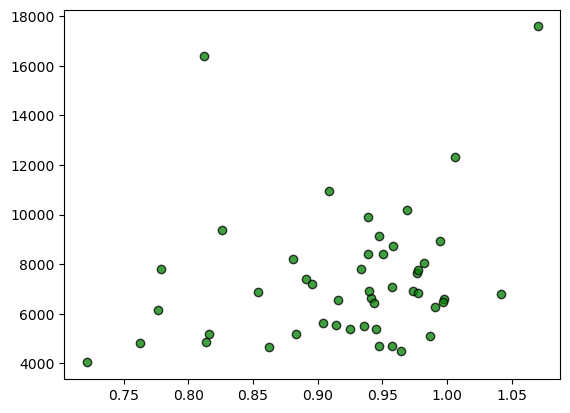

In [109]:
plt.scatter(Grad_Rates_List,Combined_Money_List,marker="o",facecolors="green",edgecolors="black",alpha=0.75)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

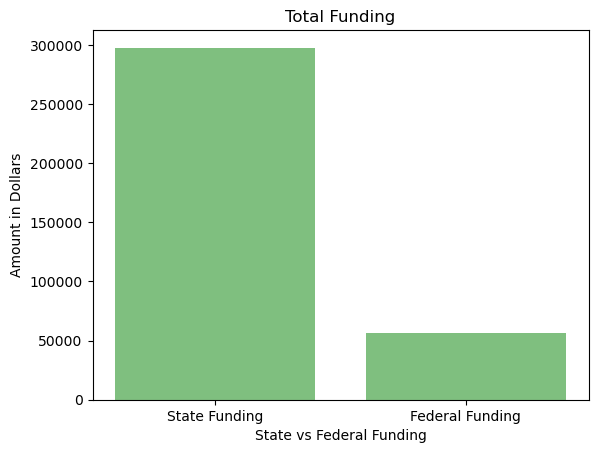

In [77]:
Revenues=[copy_merged['State Revenue Per Pupil'].sum(),copy_merged['Federal Revenue Per Pupil'].sum()]
x_axis=[0,1]
plt.bar(x_axis,Revenues,color='green',alpha=0.5,align="center")
tick_locations=[value for value in x_axis]
tick_locations
plt.xticks(tick_locations,["State Funding","Federal Funding"])
plt.title("Total Funding")
plt.xlabel("State vs Federal Funding")
plt.ylabel("Amount in Dollars")
plt.show

In [22]:
copy_merged[copy_merged["Region"]=='Northeast']

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
6,Connecticut,38722.0,7558.0,838.0,12.54,40743.0,0.950396,8396.0,Northeast
18,Maine,13170.0,5557.0,1059.0,12.20,13201.0,0.997652,6616.0,Northeast
20,Massachusetts,66360.0,6787.0,981.0,13.52,67855.0,0.977968,7768.0,Northeast
28,New Hampshire,14262.0,5399.0,870.0,12.66,14397.0,0.990623,6269.0,Northeast
29,New Jersey,96490.0,8055.0,863.0,12.37,97035.0,0.994383,8918.0,Northeast
31,New York,180351.0,8731.0,1193.0,13.09,192112.0,0.938781,9924.0,Northeast
37,Pennsylvania,129777.0,5580.0,1240.0,14.32,132699.0,0.977980,6820.0,Northeast
38,Rhode Island,9579.0,6385.0,1423.0,14.43,10260.0,0.933626,7808.0,Northeast
44,Vermont,6491.0,16284.0,1304.0,10.67,6066.0,1.070063,17588.0,Northeast


In [25]:
Northeastdf=copy_merged[copy_merged["Region"]=='Northeast']

In [26]:
Northeastdf

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
6,Connecticut,38722.0,7558.0,838.0,12.54,40743.0,0.950396,8396.0,Northeast
18,Maine,13170.0,5557.0,1059.0,12.20,13201.0,0.997652,6616.0,Northeast
20,Massachusetts,66360.0,6787.0,981.0,13.52,67855.0,0.977968,7768.0,Northeast
28,New Hampshire,14262.0,5399.0,870.0,12.66,14397.0,0.990623,6269.0,Northeast
29,New Jersey,96490.0,8055.0,863.0,12.37,97035.0,0.994383,8918.0,Northeast
31,New York,180351.0,8731.0,1193.0,13.09,192112.0,0.938781,9924.0,Northeast
37,Pennsylvania,129777.0,5580.0,1240.0,14.32,132699.0,0.977980,6820.0,Northeast
38,Rhode Island,9579.0,6385.0,1423.0,14.43,10260.0,0.933626,7808.0,Northeast
44,Vermont,6491.0,16284.0,1304.0,10.67,6066.0,1.070063,17588.0,Northeast


In [90]:
Total_NE_Rev=Northeastdf['Combined Federal and State Revenue Per Pupil'].sum()
print(Total_NE_Rev)

80107.0


In [27]:
copy_merged[copy_merged["Region"]=='Midwest']

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
12,Illinois,139228.0,3380.0,1116.0,15.28,144319.0,0.964724,4496.0,Midwest
13,Indiana,66595.0,6390.0,996.0,17.40,74731.0,0.891130,7386.0,Midwest
14,Iowa,32548.0,6239.0,946.0,14.25,36342.0,0.895603,7185.0,Midwest
15,Kansas,31922.0,6604.0,1027.0,11.86,32671.0,0.977074,7631.0,Midwest
21,Michigan,104210.0,7033.0,1170.0,18.05,118275.0,0.881082,8203.0,Midwest
22,Minnesota,58255.0,8556.0,840.0,15.78,70502.0,0.826289,9396.0,Midwest
24,Missouri,61407.0,3685.0,1010.0,13.86,64145.0,0.957315,4695.0,Midwest
26,Nebraska,20442.0,4012.0,1182.0,13.73,23152.0,0.882947,5194.0,Midwest
33,North Dakota,6900.0,6826.0,1578.0,11.65,7347.0,0.939159,8404.0,Midwest
34,Ohio,122491.0,5683.0,1124.0,16.32,117586.0,1.041714,6807.0,Midwest


In [28]:
Midwestdf=copy_merged[copy_merged["Region"]=='Midwest']

In [ ]:
Midwestdf

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
12,Illinois,139228.0,3380.0,1116.0,15.28,144319.0,0.964724,4496.0,Midwest
13,Indiana,66595.0,6390.0,996.0,17.40,74731.0,0.891130,7386.0,Midwest
14,Iowa,32548.0,6239.0,946.0,14.25,36342.0,0.895603,7185.0,Midwest
15,Kansas,31922.0,6604.0,1027.0,11.86,32671.0,0.977074,7631.0,Midwest
21,Michigan,104210.0,7033.0,1170.0,18.05,118275.0,0.881082,8203.0,Midwest
22,Minnesota,58255.0,8556.0,840.0,15.78,70502.0,0.826289,9396.0,Midwest
24,Missouri,61407.0,3685.0,1010.0,13.86,64145.0,0.957315,4695.0,Midwest
26,Nebraska,20442.0,4012.0,1182.0,13.73,23152.0,0.882947,5194.0,Midwest
33,North Dakota,6900.0,6826.0,1578.0,11.65,7347.0,0.939159,8404.0,Midwest
34,Ohio,122491.0,5683.0,1124.0,16.32,117586.0,1.041714,6807.0,Midwest


In [91]:
Total_Mid_Rev=Midwestdf['Combined Federal and State Revenue Per Pupil'].sum()
print(Total_Mid_Rev)

80630.0


In [30]:
copy_merged[copy_merged["Region"]=='South']

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0,South
7,Delaware,8070.0,8708.0,1491.0,13.94,8330.0,0.968788,10199.0,South
8,Florida,158029.0,3512.0,1147.0,15.25,183193.0,0.862637,4659.0,South
9,Georgia,92416.0,4474.0,1094.0,15.57,101078.0,0.914304,5568.0,South
16,Kentucky,42888.0,5661.0,1278.0,16.02,44032.0,0.974019,6939.0,South
17,Louisiana,37508.0,5137.0,1801.0,15.29,39928.0,0.939391,6938.0,South
19,Maryland,58896.0,7089.0,967.0,14.89,59976.0,0.981993,8056.0,South
32,North Carolina,94339.0,5368.0,1088.0,15.40,94648.0,0.996735,6456.0,South
35,Oklahoma,37033.0,4316.0,1088.0,16.12,39173.0,0.945371,5404.0,South
39,South Carolina,42246.0,5304.0,1148.0,15.31,44755.0,0.943939,6452.0,South


In [31]:
South_Regiondf=copy_merged[copy_merged["Region"]=='South']

In [32]:
South_Regiondf

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0,South
7,Delaware,8070.0,8708.0,1491.0,13.94,8330.0,0.968788,10199.0,South
8,Florida,158029.0,3512.0,1147.0,15.25,183193.0,0.862637,4659.0,South
9,Georgia,92416.0,4474.0,1094.0,15.57,101078.0,0.914304,5568.0,South
16,Kentucky,42888.0,5661.0,1278.0,16.02,44032.0,0.974019,6939.0,South
17,Louisiana,37508.0,5137.0,1801.0,15.29,39928.0,0.939391,6938.0,South
19,Maryland,58896.0,7089.0,967.0,14.89,59976.0,0.981993,8056.0,South
32,North Carolina,94339.0,5368.0,1088.0,15.40,94648.0,0.996735,6456.0,South
35,Oklahoma,37033.0,4316.0,1088.0,16.12,39173.0,0.945371,5404.0,South
39,South Carolina,42246.0,5304.0,1148.0,15.31,44755.0,0.943939,6452.0,South


In [92]:
Total_South_Rev=South_Regiondf['Combined Federal and State Revenue Per Pupil'].sum()
print(Total_South_Rev)

92066.0


In [33]:
copy_merged[copy_merged["Region"]=='West']

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0,West
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0,West
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0,West
5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0,West
10,Hawaii,10790.0,10625.0,1682.0,15.92,10721.0,1.006436,12307.0,West
11,Idaho,17198.0,4730.0,882.0,19.56,19028.0,0.903826,5612.0,West
25,Montana,9369.0,5580.0,1492.0,14.01,9784.0,0.957584,7072.0,West
27,Nevada,23038.0,3135.0,902.0,21.54,31939.0,0.721313,4037.0,West
30,New Mexico,19232.0,7497.0,1661.0,15.23,20292.0,0.947763,9158.0,West
36,Oregon,33899.0,5177.0,970.0,22.25,43637.0,0.776841,6147.0,West


In [34]:
West_Regiondf=copy_merged[copy_merged["Region"]=='West']

In [ ]:
West_Regiondf

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0,West
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0,West
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0,West
5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0,West
10,Hawaii,10790.0,10625.0,1682.0,15.92,10721.0,1.006436,12307.0,West
11,Idaho,17198.0,4730.0,882.0,19.56,19028.0,0.903826,5612.0,West
25,Montana,9369.0,5580.0,1492.0,14.01,9784.0,0.957584,7072.0,West
27,Nevada,23038.0,3135.0,902.0,21.54,31939.0,0.721313,4037.0,West
30,New Mexico,19232.0,7497.0,1661.0,15.23,20292.0,0.947763,9158.0,West
36,Oregon,33899.0,5177.0,970.0,22.25,43637.0,0.776841,6147.0,West


In [93]:
Total_West_Rev=West_Regiondf['Combined Federal and State Revenue Per Pupil'].sum()
print(Total_West_Rev)


101161.0


In [94]:
Total_Region_Revenues=[Total_NE_Rev,Total_Mid_Rev,Total_South_Rev,Total_West_Rev]
print(Total_Region_Revenues)

[80107.0, 80630.0, 92066.0, 101161.0]


<function matplotlib.pyplot.show(close=None, block=None)>

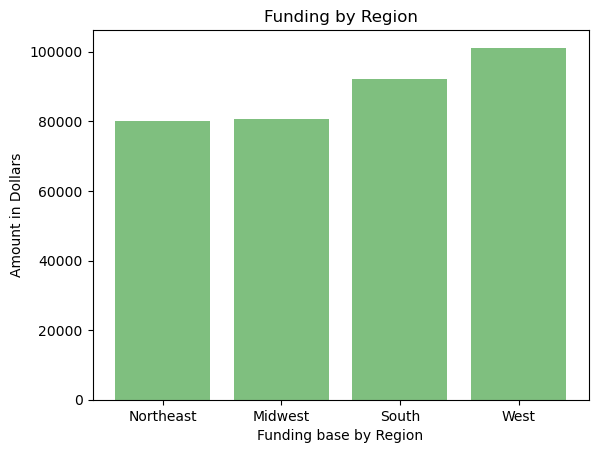

In [95]:
y_axis=[0,1,2,3]
plt.bar(y_axis,Total_Region_Revenues,color='green',alpha=0.5,align="center")
tick_locations=[value for value in y_axis]
tick_locations
plt.xticks(tick_locations,["Northeast","Midwest","South","West"])
plt.title("Funding by Region")
plt.xlabel("Funding base by Region")
plt.ylabel("Amount in Dollars")
plt.show

In [37]:
copy_merged.describe()

,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil
count,48.000000,48.000000,48.000000,48.000000,48.0000,48.000000,48.000000
mean,64470.020833,6199.833333,1174.416667,15.587083,70404.1875,0.922639,7374.250000
std,76717.674945,2564.344173,310.400622,3.041611,85266.2797,0.074673,2714.499832
min,5489.000000,3135.000000,733.000000,10.670000,6038.0000,0.721313,4037.000000
25%,17742.500000,4445.500000,973.750000,13.920000,18946.7500,0.889084,5493.250000
50%,40484.000000,5580.000000,1135.500000,15.195000,43834.5000,0.940314,6844.500000
75%,70766.000000,7047.000000,1263.750000,16.170000,85875.7500,0.974783,8251.250000
max,422125.000000,16284.000000,2464.000000,23.660000,494197.0000,1.070063,17588.000000
